In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# obtained from https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
df = pd.DataFrame(data)
df['target'] = target

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
labels = """ CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's"""

In [6]:
filtered = labels.split('\n')
headers = []
for i in filtered:
    headers.append(i.strip().split(' ')[0])

In [7]:
headers

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [8]:
df.columns = headers

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
X = df['RM']
y = df['MEDV']

In [11]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# defining functions

def OLSRegression(X,y):
    n = X.shape[0]
    x_avg = np.average(X)
    y_avg = np.average(y)
    b1 = np.dot(X-x_avg,y-y_avg)/np.sum((X-x_avg)**2)
    b0 = y_avg - (b1*x_avg)
    y_res = b1*X + b0
    return [y_res,b1,b0]

def plotOLS(X,y,y_res):
    plt.plot(X,y_res)
    plt.scatter(X, y)
    plt.xlabel('RM')
    plt.ylabel('MEDV')

def mse_(y_res,y):
    n = X.shape[0]
    mse = (np.sum((y_res - y)**2))/n
    return mse

def predictOLS(X,b1,b0):
    return b1*X + b0

In [13]:
res_ols = OLSRegression(train_x,train_y)

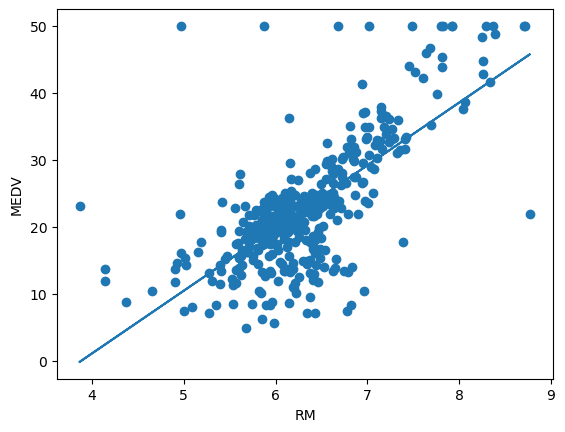

In [14]:
plotOLS(train_x,train_y,res_ols[0])

In [15]:
print(f"MSE using OLS: {mse_(res_ols[0], train_y)}")

MSE using OLS: 34.329313611289


In [16]:
class LinearRegression_:
    def __init__(self):
        self.b0 = np.random.randn() * 0.01  # Small random initialization
        self.b1 = np.random.randn() * 0.01
        
    def mse_(self,y_res,y):
        n = y.shape[0]
        return (np.sum((y_res - y)**2))/n
        
    def fit(self,X,y,lr: float = 0.01, epoch: int=100):
        train_history = []
        self.lr = lr
        n = y.shape[0]

        
        for i in range(epoch):
            #print(f"Epoch {i}: ",end='')
            y_res = self.b1*X+self.b0

            mse_ = self.mse_(y_res,y)
            if mse_ == float('inf'):
                print("Large MSE Error Found, exiting")
                break
                
            #print(f"MSE: {mse_}")
            train_history.append([mse_,self.b0,self.b1])
                            
            self.b1 = self.b1 - self.lr * ((2/n)*np.dot((np.mean(y_res)-y),X))
            self.b0 = self.b0 - self.lr * ((2/n)*np.sum(np.mean(y_res)-y))
        
        # Find best parameters
        if train_history:
            min_mse, best_b0, best_b1 = min(train_history, key=lambda x: x[0])
            self.b0 = best_b0
            self.b1 = best_b1
            print(f"\nMinimum MSE: {min_mse}, Best b0: {best_b0}, Best b1: {best_b1}")
            
        return [min_mse, best_b0, best_b1]
        
    def predict(self, X_pred):
        return self.b1*X_pred+self.b0   

In [19]:
model2 = LinearRegression_()

In [20]:
results_gd = model2.fit(train_x,train_y,lr=0.01,epoch=10000)


Minimum MSE: 43.522183875507096, Best b0: -35.51852929617772, Best b1: 9.34785352558576


In [21]:
predictions_gd = model2.predict(test_x)

In [22]:
mse_(predictions_gd, test_y)

9.366489239237875

In [23]:
prediction_ols = predictOLS(test_x,res_ols[1],res_ols[2])

In [24]:
mse_(prediction_ols,test_y)

9.301911236020475

In [25]:
r2_score(predictions_gd,test_y) * 100

-21.863748337182052

In [26]:
r2_score(prediction_ols, test_y) * 100

-21.011952758494388

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [41]:
x_train_skl = train_x.to_numpy()
x_train_skl = x_train_skl.reshape((-1, 1))

In [42]:
y_train_skl = train_y.to_numpy()

In [43]:
model.fit(x_train_skl,y_train_skl)

LinearRegression()

In [44]:
x_test_skl = test_x.to_numpy()
x_test_skl = x_test_skl.reshape((-1,1))
y_test_skl = test_y.to_numpy()

In [45]:
predictions_skl = model.predict(x_test_skl)

In [48]:
r2_score(predictions_skl, y_test_skl) * 100

-21.011952758494367

In [47]:
mse_(predictions_skl, test_y)

9.301911236020478